In [1]:
import sys
import numpy as np
import scipy as sp
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%pylab inline
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.utils.py3compat import annotate
from IPython.display import display
#from ipywidgets import FloatSlider
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from FIVOA.Drawing.Drawer import Drawer
from FIVOA.Functions.F1RosenbrockBananaFunction import F1RosenbrockBananaFunction

In [3]:
drawer = Drawer()

In [4]:
f1 = F1RosenbrockBananaFunction()

In [5]:
from FIVOA.Drawing import *
from FIVOA.Functions import *
from FIVOA import * #to access Point
from FIVOA.Constraints import *
from FIVOA.Algorithms import *

In [6]:
drawer = Drawer.Drawer()

In [7]:
f1 = F1RosenbrockBananaFunction.F1RosenbrockBananaFunction()

In [8]:
EPSILON = 1E-6
ALPHA = 1
BETA = 0.5
GAMMA = 2
SIGMA = 0.5

In [9]:
min_X1 = -5
max_X1 = 5
min_X2 = -5
max_X2 = 6
number_of_samples_of_domain = 150

In [10]:
point = Point.Point([-1.9, 2])

#equality_implicit_constraints = [EqualityImplicitConstraint4.EqualityImplicitConstraint4()]
inequality_implicit_constraints = [InequalityImplicitConstraint1.InequalityImplicitConstraint1(), InequalityImplicitConstraint2.InequalityImplicitConstraint2()]

In [11]:
drawer4 = Drawer.Drawer()
drawer4.add_function(f1)
drawer4.add_point(point)
drawer4.add_point(Point.Point([-1.8, 2.4]))
drawer4.add_point(Point.Point([-1.5, 2.8]))
drawer4.add_constraint(inequality_implicit_constraints[0])
drawer4.add_constraint(inequality_implicit_constraints[1])

drawer4.add_vector(Vector.Vector(Point.Point([0,4]), Point.Point([0,2])))
drawer4.add_vector(Vector.Vector(Point.Point([0,0]), Point.Point([2,0])))
drawer4.add_vector(Vector.Vector(Point.Point([1,-1]), Point.Point([3,-3])))
#drawer4.add_vector(Vector.Vector(Point.Point([0,0]), Point.Point([2,0])))

drawer4.set_ranges_of_variables([[min_X1,max_X1],[min_X2,max_X2]])
drawer4.set_number_of_samples_of_domain(number_of_samples_of_domain)
drawer4.set_graph_function_colour_3D_and_contour('GnBu')

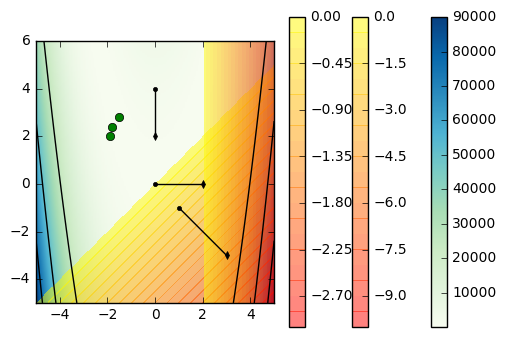

In [12]:
#drawer4.draw_contour_graph(min_X1, max_X1, min_X2, max_X2, number_of_samples_of_domain)
drawer4.draw_contour_graph()

In [13]:
drawer4.clear_vectors()

value_at_p11 = f1.value_at(Point.Point([0,4]))
value_at_p12 = f1.value_at(Point.Point([0,2]))

value_at_p21 = f1.value_at(Point.Point([0,0]))
value_at_p22 = f1.value_at(Point.Point([2,0]))

value_at_p31 = f1.value_at(Point.Point([1,-1]))
value_at_p32 = f1.value_at(Point.Point([3,-3]))

drawer4.add_vector(Vector.Vector(Point.Point([0,4, value_at_p11]), Point.Point([0,2, value_at_p12])))
drawer4.add_vector(Vector.Vector(Point.Point([0,0, value_at_p21]), Point.Point([2,0, value_at_p22])))
drawer4.add_vector(Vector.Vector(Point.Point([1,-1, value_at_p31]), Point.Point([3,-3, value_at_p32])))

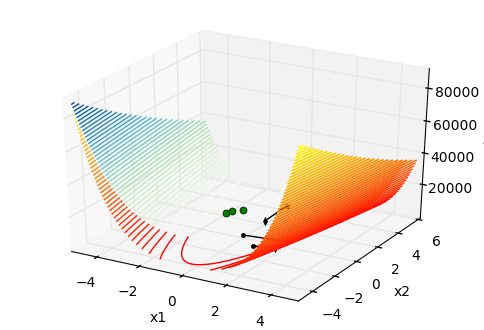

In [14]:
drawer4.draw_3D_graph()

In [15]:
#%matplotlib notebook

In [16]:
f1 = F1RosenbrockBananaFunction.F1RosenbrockBananaFunction()
point = Point.Point([-1.9, 2])

explicit_constraint_on_X1 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)
explicit_constraint_on_X2 = ExplicitConstraintForOneDimension.ExplicitConstraintForOneDimension(-100., +100.)
explicit_constraints = [explicit_constraint_on_X1, explicit_constraint_on_X2]

implicit_constraint_1 = InequalityImplicitConstraint1.InequalityImplicitConstraint1()
implicit_constraint_2 = InequalityImplicitConstraint2.InequalityImplicitConstraint2()
#implicit_constraint_3 = EqualityImplicitConstraint4.EqualityImplicitConstraint4()

implicit_constraints = [implicit_constraint_1,implicit_constraint_2]

box_algorithm = BoxAlgorithm.BoxAlgorithm(f1, explicit_constraints, implicit_constraints, EPSILON, ALPHA)
solution_box, logger_box = box_algorithm.run(point)

In [17]:
print solution_box.elements

[-0.772709446757629, 0.5847909575990424]


In [18]:
animator = Animator.Animator()

In [19]:
drawer5 = Drawer.Drawer()
drawer5.add_function(f1)
#drawer4.add_point(test_point_rosenbrock_optimum)
for constraint in implicit_constraints:
    drawer5.add_constraint(constraint)
#drawer5.set_ranges_of_variables([[-5,5],[-5,6]])
#drawer5.set_number_of_samples_of_domain(150)
#drawer5.set_cmap('GnBu')

In [20]:
presenter = Presenter.Presenter(logger=logger_box, drawer=drawer5, animator=animator)

In [21]:
presenter.present_contour()

In [22]:
presenter2 = Presenter.Presenter(logger=logger_box, drawer=Drawer.Drawer(), animator=Animator.Animator())

In [23]:
presenter2.present_contour()

In [24]:
presenter2.present_3D()

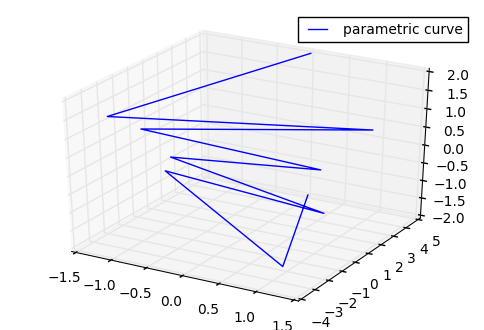

In [25]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 10)
z = np.linspace(-2, 2, 10)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

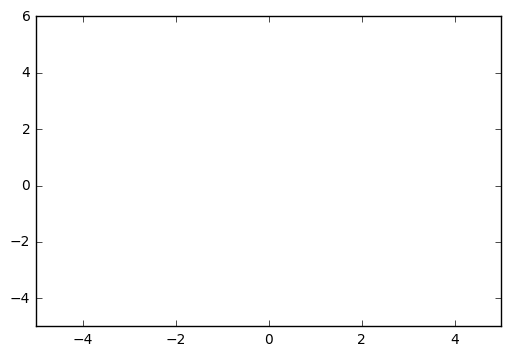

In [26]:
plt.clf()
plt.close('all')
#TODO need this?
#plt.figure(iteration)

plt.axis([min_X1, max_X1, min_X2, max_X2])
ax = plt.gca()
ax.set_autoscale_on(False)